<a href="https://colab.research.google.com/github/Rahul-Gadadhar/Bharat-Intern/blob/master/Task%202%20-%20Movie%20Recommendation/Task_2_Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 2** : Movie Recommendation System

by Rahul Gadadhar

---


**Importing Necessary Python Libraries :**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, accuracy_score

**Loading the Dataset :**

In [37]:
df = pd.read_csv('movie_data.csv')
df

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,status,title,rating_average,rating_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,165.0,Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,132.0,Released,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",es,El Mariachi,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",2040920,81.0,Released,El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",en,Newlyweds,0.642552,[],[],0,85.0,Released,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,"Signed, Sealed, Delivered",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",0,120.0,Released,"Signed, Sealed, Delivered",7.0,6
4801,0,[],en,Shanghai Calling,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",0,98.0,Released,Shanghai Calling,5.7,7


**Displaying Information about the Dataset :**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   original_title        4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   revenue               4803 non-null   int64  
 8   runtime               4801 non-null   float64
 9   status                4803 non-null   object 
 10  title                 4803 non-null   object 
 11  rating_average        4803 non-null   float64
 12  rating_count          4803 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 487.9+ KB


**Displaying the first 10 rows of the dataset :**

In [52]:
print(df.head(10))

      budget                                         genres original_language  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]                en   
1  300000000                   [Adventure, Fantasy, Action]                en   
2  245000000                     [Action, Adventure, Crime]                en   
3  250000000               [Action, Crime, Drama, Thriller]                en   
4  260000000           [Action, Adventure, Science Fiction]                en   
5  258000000                   [Fantasy, Action, Adventure]                en   
6  260000000                            [Animation, Family]                en   
7  280000000           [Action, Adventure, Science Fiction]                en   
8  250000000                   [Adventure, Fantasy, Family]                en   
9  250000000                   [Action, Adventure, Fantasy]                en   

                             original_title  popularity  \
0                                    Avatar  150.

**Checking for Missing Values :**

In [40]:
print(df.isnull().sum())

budget                  0
genres                  0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
revenue                 0
runtime                 2
status                  0
title                   0
rating_average          0
rating_count            0
dtype: int64


**Performing various Preprocessing steps :**

In [41]:
# Convert genres column to list of genres
df['genres'] = df['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])

In [42]:
# Function to extract production company name from list of dictionaries
def extract_production_company(companies):
    return [company['name'] for company in eval(companies)]

# Apply the function to production_companies column
df['production_companies'] = df['production_companies'].apply(extract_production_company)

In [43]:
# Function to extract country name from list of dictionaries
def extract_country(countries):
    return [country['name'] for country in eval(countries)]

# Apply the function to production_countries column
df['production_countries'] = df['production_countries'].apply(extract_country)

**Histplot to visualise Rating Average Distribution :**

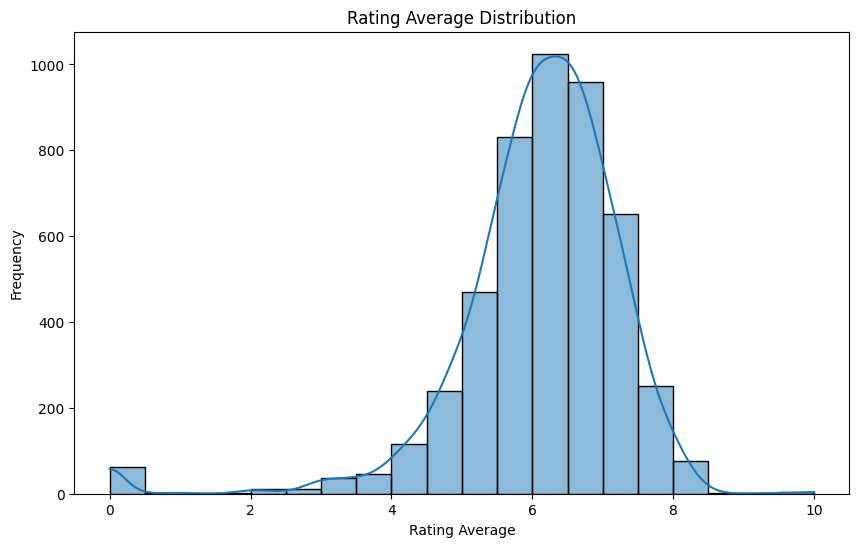

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(df['rating_average'], bins=20, kde=True)
plt.title('Rating Average Distribution')
plt.xlabel('Rating Average')
plt.ylabel('Frequency')
plt.show()


**Pie Chart for displaying the Genre Distribution :**

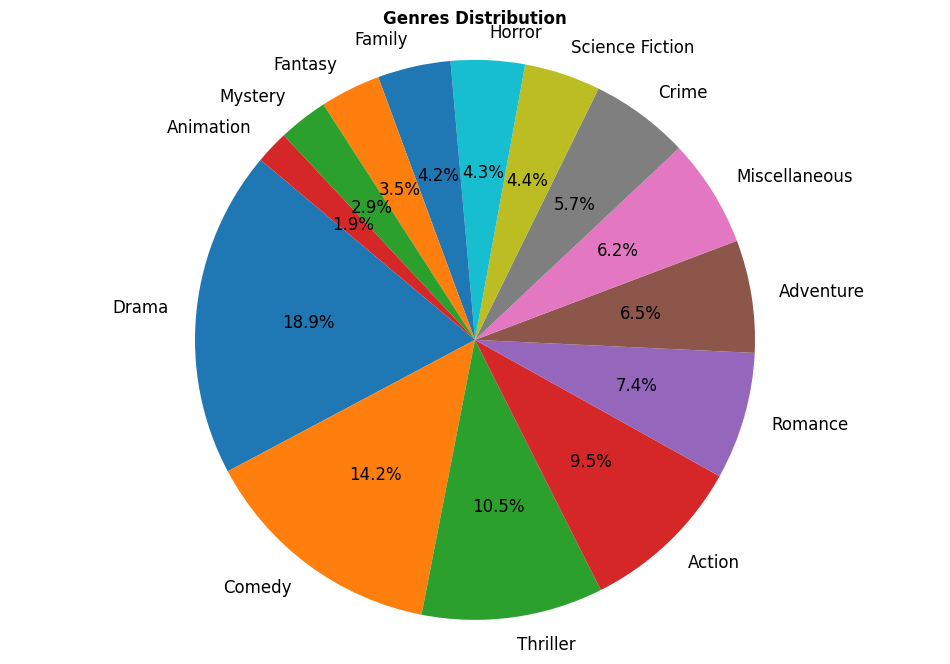

In [45]:
# Plotting genres distribution (pie chart)
genres_count = {}
for genres_list in df['genres']:
    for genre in genres_list:
        genres_count[genre] = genres_count.get(genre, 0) + 1

# Calculate total percentage of genres with less than 1.9%
total_percentage = sum(genres_count.values())
genres_count_filtered = {genre: count for genre, count in genres_count.items() if count / total_percentage >= 0.019}
other_count = total_percentage - sum(genres_count_filtered.values())
genres_count_filtered['Miscellaneous'] = other_count

# Sort genres_count_filtered dictionary by values (genre counts) in descending order
genres_count_sorted = dict(sorted(genres_count_filtered.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12, 8))
plt.pie(genres_count_sorted.values(), labels=genres_count_sorted.keys(), autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Genres Distribution', fontweight='bold')
plt.axis('equal')
plt.show()


**Scatterplot to visualise Budget vs Revenue :**

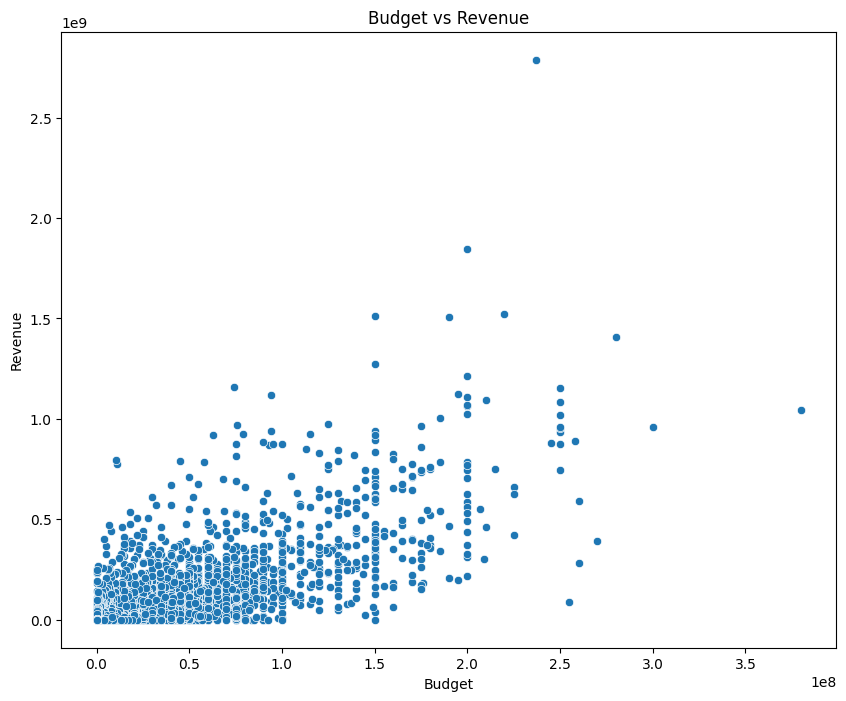

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


**Hexbin plot to visualise Rating Average vs Rating Count :**

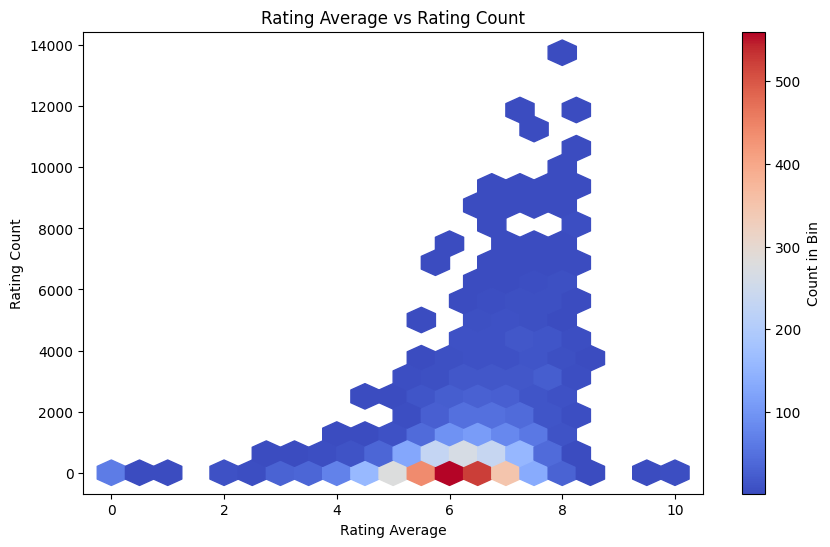

In [47]:
plt.figure(figsize=(10,6))
plt.hexbin(df['rating_average'], df['rating_count'], gridsize=20, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Count in Bin')
plt.title('Rating Average vs Rating Count')
plt.xlabel('Rating Average')
plt.ylabel('Rating Count')
plt.show()


**Histplot to visualise Runtime Distribution :**

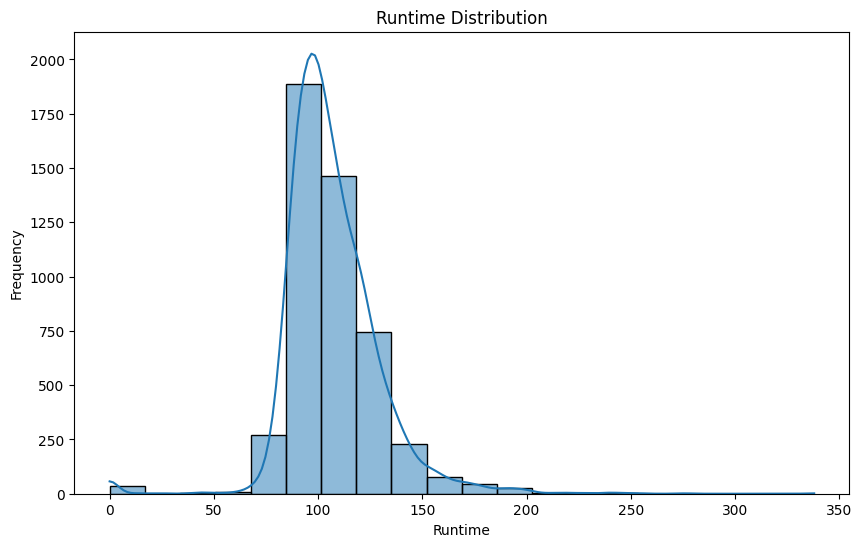

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(df['runtime'], bins=20, kde=True)
plt.title('Runtime Distribution')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()


**Function to to recommend movies based on user input :**

In [49]:
def recommend_movies(genre, language, budget, country):
    recommended_movies = df[(df['genres'].apply(lambda x: genre in x)) &
                            (df['original_language'] == language) &
                            (df['budget'] >= budget) &
                            (df['production_countries'].apply(lambda x: country in x))]
    return recommended_movies


**Example Recommendation :**

In [50]:
recommended_movies = recommend_movies('Action', 'en', 200000000, 'United States of America')
print(recommended_movies[['original_title', 'budget', 'revenue', 'genres', 'rating_average']].head())

                             original_title     budget     revenue  \
0                                    Avatar  237000000  2787965087   
1  Pirates of the Caribbean: At World's End  300000000   961000000   
2                                   Spectre  245000000   880674609   
3                     The Dark Knight Rises  250000000  1084939099   
4                               John Carter  260000000   284139100   

                                          genres  rating_average  
0  [Action, Adventure, Fantasy, Science Fiction]             7.2  
1                   [Adventure, Fantasy, Action]             6.9  
2                     [Action, Adventure, Crime]             6.3  
3               [Action, Crime, Drama, Thriller]             7.6  
4           [Action, Adventure, Science Fiction]             6.1  
